## Fit 3D Variogram Functions

The 3D Gaussian variogram function has the following form:

$\gamma = s(1 - e^{-3h^{\top} \Omega h} + 0.06e^{-7.07h^{\top} \Omega h})$

where $\Omega$ is a diagonal matrix with diagonal terms $= [\frac{1}{{r_{lon}}^2}, \frac{1}{{r_{lat}}^2}, \frac{1}{{r_{time}}^2}]$

In [3]:
%load_ext autoreload
%autoreload 2

from ocean_navigation_simulator.generative_error_model.variogram.VariogramFitting import VariogramFitting
import pandas as pd
import os

# read in 2D/3D variogram data
save_dir = "/home/jonas/Documents/Thesis/OceanPlatformControl/data/drifter_data/variogram_tuned"
file_name = "tuned_2d_hindcast_area1_True_True.npy"
file_path = os.path.join(save_dir, file_name)
data = pd.read_csv(file_path)
data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,space_lag,t_lag,u_semivariance,v_semivariance,detrend_u,detrend_v
0,10,10,0.294787,0.318626,"[-0.06938110274000732, 0.19566641387425715]","[-0.03511778008057404, 0.19982908711777983]"
1,10,20,0.396184,0.286670,"[-0.06938110274000732, 0.19566641387425715]","[-0.03511778008057404, 0.19982908711777983]"
2,10,30,0.230876,0.261810,"[-0.06938110274000732, 0.19566641387425715]","[-0.03511778008057404, 0.19982908711777983]"
3,10,40,0.296069,0.308653,"[-0.06938110274000732, 0.19566641387425715]","[-0.03511778008057404, 0.19982908711777983]"
4,10,50,0.383273,0.346055,"[-0.06938110274000732, 0.19566641387425715]","[-0.03511778008057404, 0.19982908711777983]"
...,...,...,...,...,...,...
7495,1500,460,1.241532,1.275846,"[-0.06938110274000732, 0.19566641387425715]","[-0.03511778008057404, 0.19982908711777983]"
7496,1500,470,1.228565,1.214850,"[-0.06938110274000732, 0.19566641387425715]","[-0.03511778008057404, 0.19982908711777983]"
7497,1500,480,1.163905,1.275327,"[-0.06938110274000732, 0.19566641387425715]","[-0.03511778008057404, 0.19982908711777983]"
7498,1500,490,1.238308,1.245128,"[-0.06938110274000732, 0.19566641387425715]","[-0.03511778008057404, 0.19982908711777983]"


In [6]:
fitted_v = VariogramFitting(data, ("space_lag", "t_lag"), error_var="u_semivariance")
# list of optimization algorithms: https://lmfit.github.io/lmfit-py/fitting.html
fitted_v.fit_model(4, method="emcee", constrain_weighting=True)

Number of models: 4
Type of model: gaussian_2d


100%|██████████| 1000/1000 [00:47<00:00, 20.99it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 11 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [ 93.74983246 101.96629547 109.93949733  96.94416104 107.34318854
 105.3803104   99.17378162  97.79911516 103.77113802 101.92401304
 115.82291551]
Parameters:
 [[1.76189016e-01 2.34811835e+02 4.75836537e+02]
 [2.47688519e-01 3.54375779e+02 2.75355275e+01]
 [2.03998238e-01 2.04052592e+02 1.95791680e+02]
 [3.72124227e-01 4.30695138e+02 3.44628658e+02]]


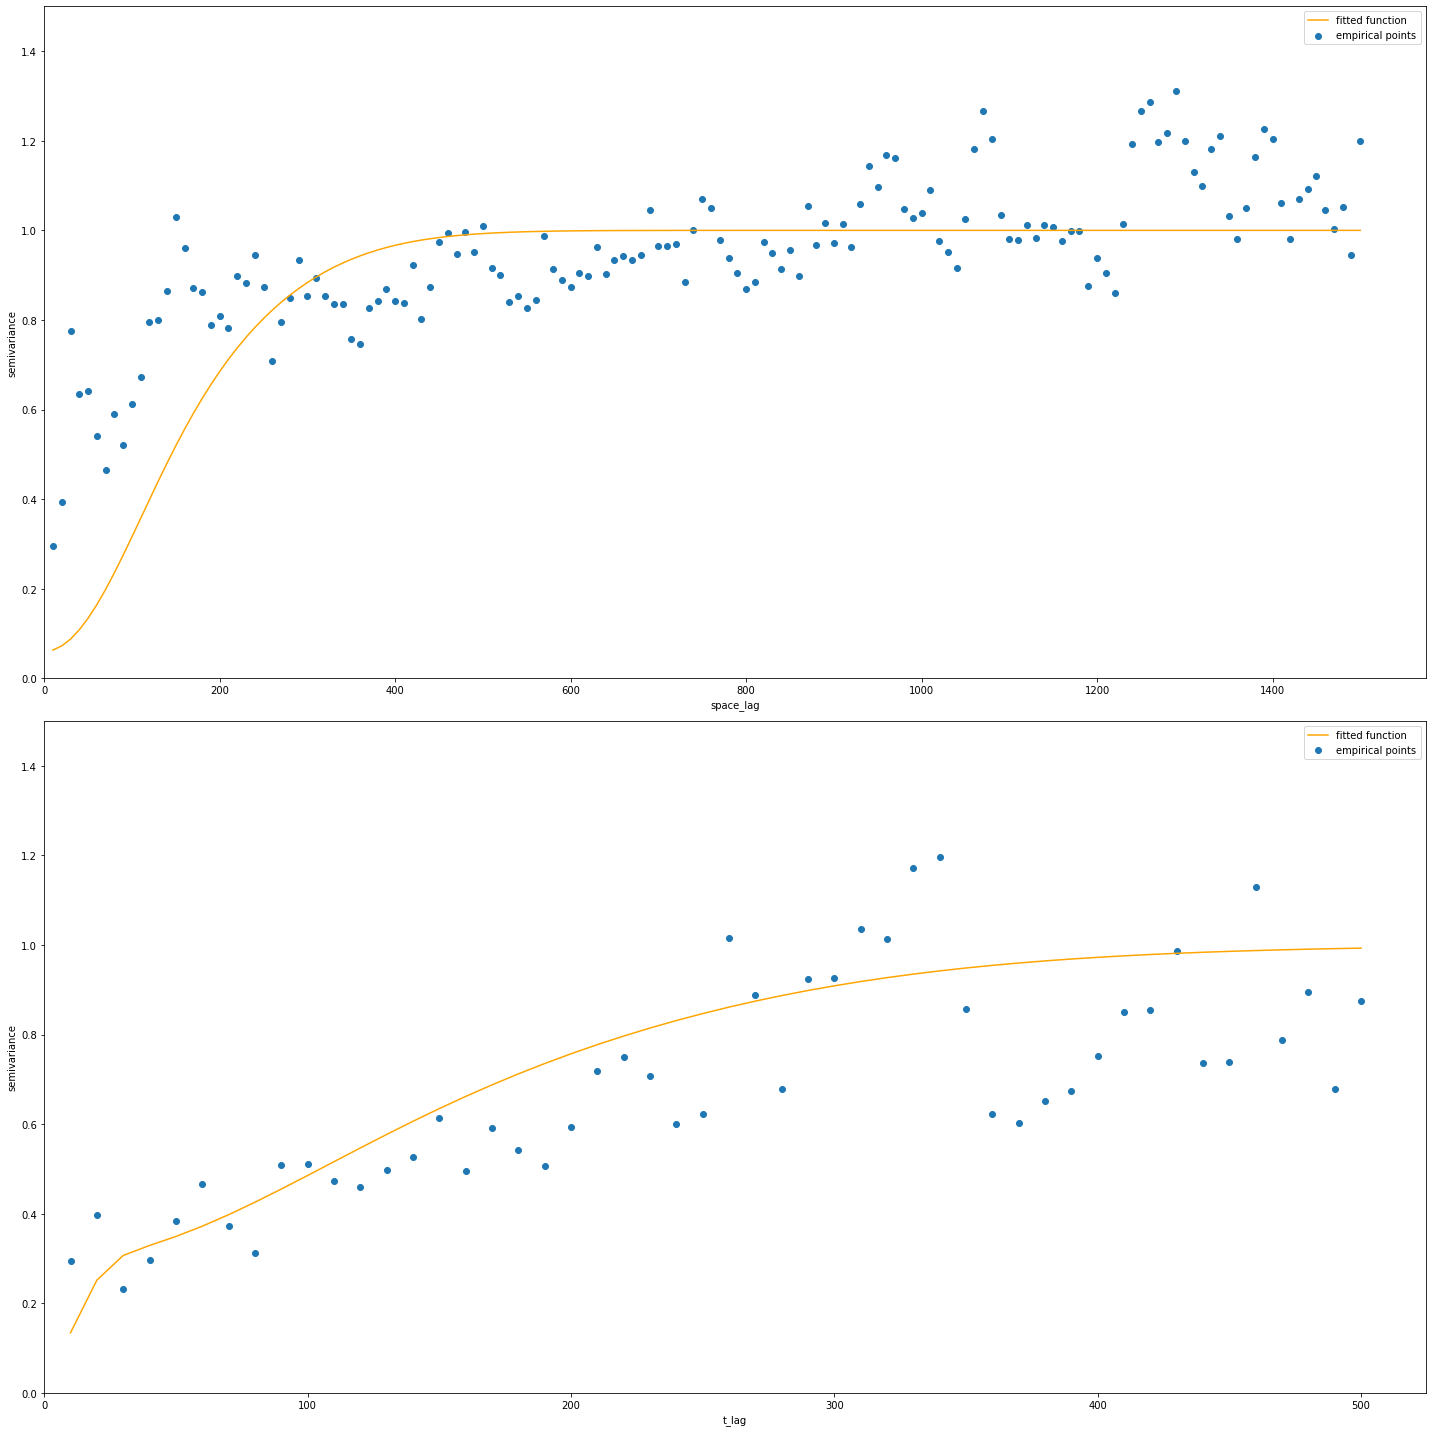

In [7]:
save_path = f"/home/jonas/Downloads/plots/fitted_func_only_cross_buoy.png"
figure = fitted_v.plot_all_dims(save_path=None)

In [8]:
# save parameters
save_dir = "/home/jonas/Documents/Thesis/OceanPlatformControl/data/drifter_data/variogram_params"
fitted_v.save_params(os.path.join(save_dir, file_name))

## Plot model from parameters

Number of models: 4
Type of model: gaussian_2d
[[1.76189016e-01 2.34811835e+02 4.75836537e+02]
 [2.47688519e-01 3.54375779e+02 2.75355275e+01]
 [2.03998238e-01 2.04052592e+02 1.95791680e+02]
 [3.72124227e-01 4.30695138e+02 3.44628658e+02]]


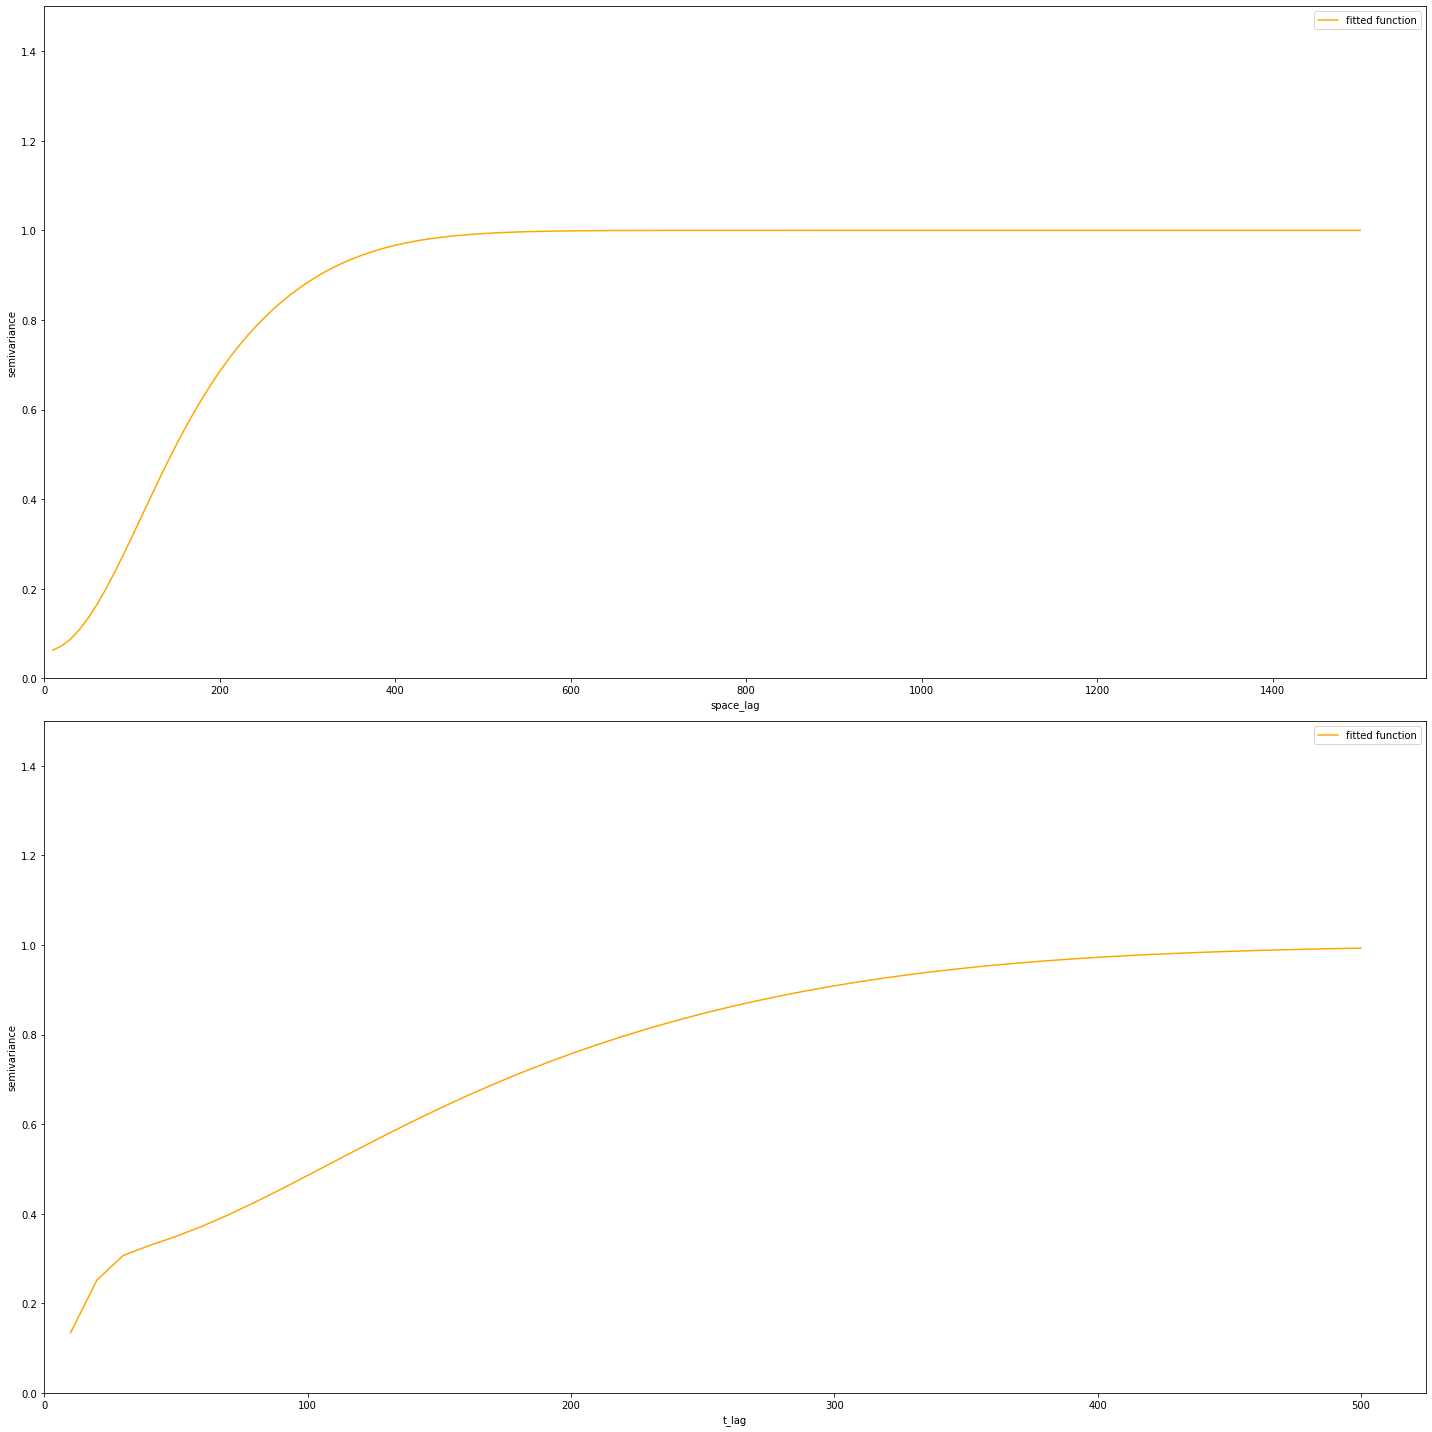

In [10]:
fitted_v = VariogramFitting(data, ("space_lag", "t_lag"), error_var="u_semivariance")
fitted_v.load_params("/home/jonas/Documents/Thesis/OceanPlatformControl/data/drifter_data/variogram_params/tuned_2d_hindcast_area1_True_True.npy")
fitted_v.plot_all_dims(plot_empirical=False)
print(fitted_v.popt)